In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([2.0, 3.0, 5.0])
y = np.array([1.0, 5.0, 6.0])

In [2]:
def train_with_history(x, y, lr = 0.004, steps = 200):
    theta = 0.0
    hist_theta, hist_cost = [], []

    for _ in range(steps):
        y_hat = theta * x
        J = np.mean((y_hat - y) ** 2)
        grad = 2.0 * np.mean(x * (y_hat - y))

        hist_theta.append(theta)
        hist_cost.append(J)

        theta -= lr * grad
    
    return np.array(hist_theta), np.array(hist_cost)

In [3]:
def make_theta_cost_curve(x, y, hist_theta, pad = 1.0, n = 400):
    tmin = float(np.min(hist_theta)) - pad
    tmax = float(np.max(hist_theta)) + pad

    theta_grid = np.linspace(tmin, tmax, n)

    J_grid = np.array([cost_function(t, x, y) for t in theta_grid])
    
    return theta_grid, J_grid

In [4]:
def setup_summary_axes(figsize = (12,4)):
    fig, ax = plt.subplots(1,2, figsize = figsize)

    return fig, ax

In [5]:
def setup_sumary_axes(figsize = (12, 4)):
    fig, ax = plt.subplots(1,2, figsize = figsize)

    return fig, ax

In [6]:
def plot_data_space(ax1, x, y, hist_theta, step_stride = 30, xlim = (0, 6), ylim = (0,7)):

    ax1.scatter(x, y)
    xs = np.linspace(xlim[0], xlim[1], 200)

    for i in range (0, len(hist_theta), step_stride):
        th = hist_theta[i]
        ax1.plot(xs, th * xs, alpha = 0.5)
        ax1.text(xlim[1] - 0.2, th * (xlim[1] - 0.2), f"{i}", fontsize = 8, va ="center")

    ax1.set_title("Data space: lines y=0x during training")
    ax1.set_xlabel("x"); ax1.set_ylabel("y")
    ax1.set_xlim(*xlim); ax1.set_ylim(*ylim); ax1.grid(alpha=0.3)

In [8]:
def plot_theta_space(ax0, theta_grid, J_grid, hist_theta, hist_cost):
    """(A) θ-공간: J(θ) + GD 경로"""
    ax0.plot(theta_grid, J_grid, lw=2)
    ax0.plot(hist_theta, hist_cost, marker="o", ms=3, lw=1)
    ax0.set_title("Parameter space: J(θ) and GD path")
    ax0.set_xlabel("θ")
    ax0.set_ylabel("J(θ)")
    ax0.grid(alpha=0.3)

def plot_descent_summary_v2(x,y, hist_theta, hist_cost, step_stride = 20):

    theta_grid, J_grid = make_theta_cost_curve(x, y, hist_theta, pad = 1.0, n = 400)

    fig, ax = setup_summary_axes(figsize=(12, 4))

    plot_theta_space(ax[0], theta_grid, J_grid, hist_theta, hist_cost)
    
    plot_data_space(ax[1], x, y, hist_theta, step_stride = step_stride)

    plt.tight_layout()
    plt.show()

Initial Thetas: [0.         0.12533333 0.23796622 0.33918565 0.43014817]
Initial Costs: [20.66666667 16.93852919 13.92767873 11.49611054  9.53237176]


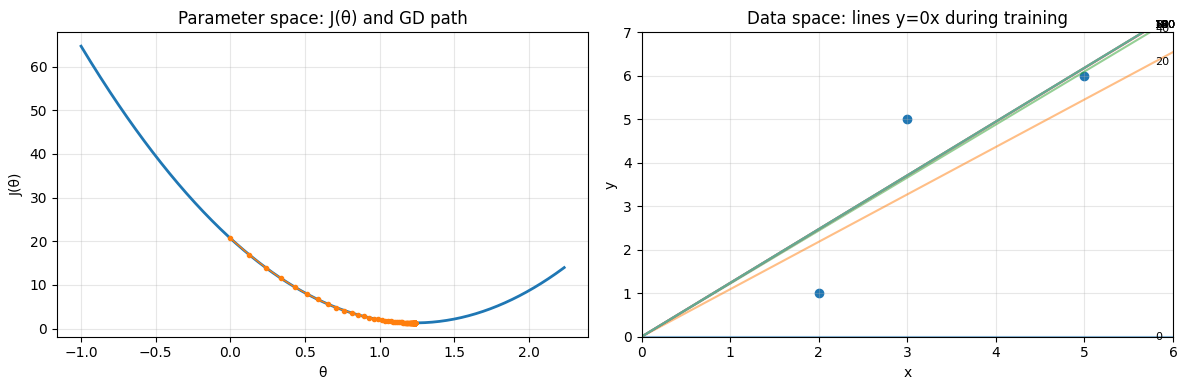

In [15]:

def cost_function(theta, x, y):
    return np.mean((theta * x - y) ** 2)

hist_theta, hist_cost = train_with_history(
x, y, lr=0.004, steps=200
)
# 2. 결과 데이터 확인 (처음 5개 값)
print("Initial Thetas:", hist_theta[:5])
print("Initial Costs:", hist_cost[:5])

def plot_descent_summary_v2(x, y, hist_theta, hist_cost, step_stride=20):
    """셀3에서 호출할 최종 함수(위 함수들을 순서대로 실행)"""
    theta_grid, J_grid = make_theta_cost_curve(x, y, hist_theta, pad=1.0, n=400)
    fig, ax = setup_summary_axes(figsize=(12, 4))

    plot_theta_space(ax[0], theta_grid, J_grid, hist_theta, hist_cost)
    plot_data_space(ax[1], x, y, hist_theta, step_stride=step_stride)

    plt.tight_layout()
    plt.show()

# 실행
plot_descent_summary_v2(x, y, hist_theta, hist_cost, step_stride=20)

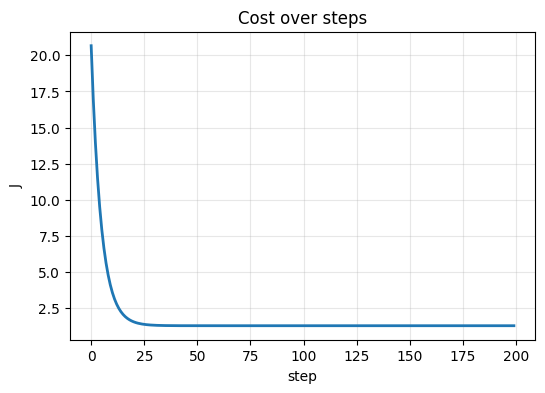

In [16]:
def plot_cost_over_steps(hist_cost):
    plt.figure(figsize=(6, 4))
    plt.plot(hist_cost, lw=2)
    plt.title("Cost over steps")
    plt.xlabel("step")
    plt.ylabel("J")
    plt.grid(alpha=0.3)
    plt.show()
plot_cost_over_steps(hist_cost)